## Extension Analysis of Different Datasets

In [23]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from folium import Marker, Map, Circle, Icon
from folium.plugins import HeatMap
from matplotlib import pyplot as plt

In [24]:
foodDF = pd.read_csv("data/foodEstablishments.csv")
print(foodDF.shape)

(3008, 14)


In [25]:
# Drop all rows that have zeros in Long or Lat
foodDF = foodDF[(foodDF['Latitude'] != 0) & (foodDF['Longitude'] != 0)]
print(foodDF.shape)

(1934, 14)


In [26]:
import folium
from geopy import Nominatim

# create a map object
m = folium.Map(location=[42.291721284828014, -71.07597990028424], zoom_start=13)

foodDF['Latitude'] = foodDF['Latitude'].astype(float)
foodDF['Longitude'] = foodDF['Longitude'].astype(float)

HeatMap(foodDF[['Latitude', 'Longitude']]).add_to(m)


folium.GeoJson('City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.geojson',
               name='geojson').add_to(m)

# display the map
m

m.save("Food_Establishments.html")

In [27]:
Zip_PD_A1 =[2108, 2109, 2110, 2111, 2113, 2114, 2116, 2129, 2199 ]
Zip_PD_A7 = [2121, 2122, 2124, 2125]
Zip_PD_A15 = [2130, 2131, 2132]
Zip_PD_B2 = [ 2119, 2120, 2126, 2130]
Zip_PD_B3 = [2124, 2125, 2126, 2131, 2136, 2186]
Zip_PD_C6 = [2127, 2210]
Zip_PD_C11 = [2124, 2125, 2136, 2186]
Zip_PD_D4 = [2115, 2116, 2118, 2119, 2120, 2130, 2199]
Zip_PD_D14 = [2128]
Zip_PD_E5 = [2130, 2131, 2132, 2136, 2467]
Zip_PD_E13 = [ 2130, 2131, 2132, 2136]
Zip_PD_E18 = [ 2126, 2136, 2186]

def get_district(zip_code):
    if zip_code in Zip_PD_A1:
        return 'A1'
    elif zip_code in Zip_PD_A7:
        return 'A7'
    elif zip_code in Zip_PD_A15:
        return 'A15'
    elif zip_code in Zip_PD_B2:
        return 'B2'
    elif zip_code in Zip_PD_B3:
        return 'B3'
    elif zip_code in Zip_PD_C6:
        return 'C6'
    elif zip_code in Zip_PD_C11:
        return 'C11'
    elif zip_code in Zip_PD_D4:
        return 'D4'
    elif zip_code in Zip_PD_D14:
        return 'D14'
    elif zip_code in Zip_PD_E5:
        return 'E5'
    elif zip_code in Zip_PD_E13:
        return 'E13'
    elif zip_code in Zip_PD_E18:
        return 'E18'
    else:
        return 'Unknown'

## Income Restricted Housing and Gun-violence

In [28]:
import pandas as pd

housing = pd.read_csv('data/income-restricted-inventory-2021.csv')


In [29]:
housing = housing[['Zip Code', 'TtlProjUnits', 'Total Income-Restricted']]
housing['District'] = housing['Zip Code'].apply(lambda x: get_district((x)))
print(housing['District'].unique())
x = housing[housing['District'] == 'Unknown']
x

['B2' 'A7' 'A1' 'C6' 'B3' 'A15' 'D14' 'D4' 'Unknown']


,Zip Code,TtlProjUnits,Total Income-Restricted,District
38,2134.0,213,160,Unknown
70,2134.0,20,20,Unknown
88,2135.0,295,38,Unknown
103,2215.0,172,13,Unknown
111,2134.0,50,50,Unknown
...,...,...,...,...
1365,2135.0,132,17,Unknown
1401,2135.0,17,2,Unknown
1415,2215.0,45,6,Unknown
1418,2215.0,212,24,Unknown


In [30]:
print(x['TtlProjUnits'].sum())
print(x['Total Income-Restricted'].sum())

print('Ratio: ', x['Total Income-Restricted'].sum()/x['TtlProjUnits'].sum() )

10046
5065
Ratio:  0.5041807684650608


In [31]:
cir_df = pd.read_csv("data/CrimeIncidentReports.csv")

# define outright crimes

OutRightCrimes = ['LARCENY ALL OTHERS', 
'HARASSMENT/ CRIMINAL HARASSMENT',
'PROPERTY - LOST/ MISSING',  
'FRAUD - WIRE', 
'ASSAULT - AGGRAVATED',
'THREATS TO DO BODILY HARM',  
'AUTO THEFT',
'LARCENY THEFT FROM MV - NON-ACCESSORY', 
'PROPERTY - FOUND',
'BALLISTICS EVIDENCE/FOUND', 
'ASSAULT - SIMPLE', 
'FIREARM/WEAPON - FOUND OR CONFISCATED',
'EXTORTION OR BLACKMAIL',
'LARCENY THEFT OF BICYCLE',
'VERBAL DISPUTE', 'SUDDEN DEATH',
'FRAUD - FALSE PRETENSE / SCHEME',
'FRAUD - IMPERSONATION',
'LARCENY SHOPLIFTING', 
'BURGLARY - RESIDENTIAL',
'DEATH INVESTIGATION', 
'LARCENY THEFT FROM BUILDING',
'ROBBERY',
'WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TRAFFICKING/ OTHER',
'LARCENY THEFT OF MV PARTS & ACCESSORIES',
'MISSING PERSON - LOCATED', 
'SICK ASSIST - DRUG RELATED ILLNESS',
'SERVICE TO OTHER AGENCY',
'BURGLARY - COMMERICAL', 
'FORGERY / COUNTERFEITING',
'RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON)',
'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE',
'MURDER, NON-NEGLIGIENT MANSLAUGHTER',
'VAL - OPERATING W/O AUTHORIZATION LAWFUL',
'VAL - OPERATING AFTER REV/SUSP.', 
'VAL - VIOLATION OF AUTO LAW',
'AUTO THEFT - LEASED/RENTED VEHICLE', 
'INTIMIDATING WITNESS',
'STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING',
'ARSON',
'MISSING PERSON', 
'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT',
'RECOVERED - MV RECOVERED IN BOSTON (STOLEN IN BOSTON) MUST BE SUPPLEMENTAL',
'MISSING PERSON - NOT REPORTED - LOCATED',
'PROPERTY - ACCIDENTAL DAMAGE', 
'LIQUOR LAW VIOLATION',
'AUTO THEFT - MOTORCYCLE / SCOOTER',
'LICENSE PREMISE VIOLATION', 
'PROPERTY - LOST THEN LOCATED',
'KIDNAPPING/CUSTODIAL KIDNAPPING/ ABDUCTION',
'LARCENY PICK-POCKET',
'WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPLEMENTAL)',
'DANGEROUS OR HAZARDOUS CONDITION', 
'FUGITIVE FROM JUSTICE',
'LARCENY PURSE SNATCH - NO FORCE', 
'FIREARM/WEAPON - LOST', 
'PROPERTY - STOLEN THEN RECOVERED',
'AIRCRAFT INCIDENTS', 
'VIOLATION - CITY ORDINANCE',
'BREAKING AND ENTERING (B&E) MOTOR VEHICLE', 
'AFFRAY',
'MURDER, NON-NEGLIGENT MANSLAUGHTER', 
'BOMB THREAT',
'EVADING FARE', 
'OPERATING UNDER THE INFLUENCE (OUI) DRUGS',
'LARCENY THEFT FROM COIN-OP MACHINE', 
'PROSTITUTION - SOLICITING',
'OTHER OFFENSE', 
'POSSESSION OF BURGLARIOUS TOOLS',
'BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO PROPERTY STOLEN)',
'EXPLOSIVES - TURNED IN OR FOUND',
'DRUGS - POSSESSION OF DRUG PARAPHANALIA',
'INJURY BICYCLE NO M/V INVOLVED', 
'MANSLAUGHTER - VEHICLE - NEGLIGENCE',
'EXPLOSIVES - POSSESSION OR USE', 
'PROSTITUTION',
'PRISONER ESCAPE / ESCAPE & RECAPTURE',
'FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH']

In [32]:
cir_df = cir_df[cir_df['OFFENSE_DESCRIPTION'].isin(OutRightCrimes)]

In [33]:
cir_df = cir_df[['DISTRICT', 'OFFENSE_DESCRIPTION', 'Lat', 'Long', 'Location']]
print(cir_df['DISTRICT'].unique())
print(cir_df['DISTRICT'].value_counts())
cir_df

['E5' 'C11' 'B2' 'B3' 'A7' 'A1' 'D4' 'D14' 'E18' nan 'E13' 'C6' 'A15'
 'External']
D4          1367
A1          1304
B2          1176
C11         1113
B3           986
C6           691
D14          650
E13          518
E18          495
A7           471
E5           453
A15          132
External      11
Name: DISTRICT, dtype: int64


,DISTRICT,OFFENSE_DESCRIPTION,Lat,Long,Location
0,E5,FORGERY / COUNTERFEITING,42.286301,-71.128836,"(42.28630091783755, -71.12883623098992)"
1,E5,HARASSMENT/ CRIMINAL HARASSMENT,42.287094,-71.148221,"(42.28709355259107, -71.14822128377165)"
4,C11,PROPERTY - FOUND,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)"
5,B2,VERBAL DISPUTE,NaN,NaN,NaN
6,C11,ASSAULT - SIMPLE,42.304222,-71.079185,"(42.30422175471675, -71.0791845947074)"
...,...,...,...,...,...
20218,D4,LARCENY ALL OTHERS,42.339542,-71.069409,"(42.33954198983014, -71.06940876967543)"
20220,D4,ASSAULT - AGGRAVATED,42.339077,-71.092334,"(42.33907698841371, -71.09233394580097)"
20222,B3,ASSAULT - SIMPLE,42.268948,-71.096083,"(42.26894762286374, -71.09608343630367)"
20223,A7,ROBBERY,42.374951,-71.035879,"(42.374951286048145, -71.03587933899138)"


In [34]:
# put into dataframe

districts = ['B2','A7' ,'A1', 'C6', 'B3', 'A15', 'D14',  'D4']
num_income_restricted = [9819, 11320, 8026, 3824, 1936, 5091, 2761, 8977]
total_housing_units = [11545, 13086, 16179, 9364, 2276, 6806, 3857, 12906]
ratio_restricted = []
for i in range(len(total_housing_units)):
    ratio_restricted.append(num_income_restricted[i]/total_housing_units[i])
print(ratio_restricted)
num_incidents = [1030, 376, 978, 583, 828, 117, 587, 1212]



[0.8504980511043742, 0.8650466147027357, 0.49607515915693184, 0.40837249038872275, 0.8506151142355008, 0.7480164560681751, 0.7158413274565725, 0.6955679528901286]


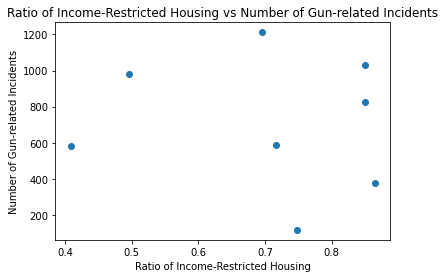

In [35]:
#plt.bar(districts, ratio_restricted )
plt.xlabel('Ratio of Income-Restricted Housing')
plt.ylabel('Number of Gun-related Incidents')
plt.title('Ratio of Income-Restricted Housing vs Number of Gun-related Incidents')
plt.scatter(ratio_restricted, num_incidents)


In [36]:
# Entertainment dataset 
e = pd.read_csv('data/entertainmentLicenses.csv')
e = e[['dba_name', 'zip']]
e['District'] = e['zip'].apply(lambda x: get_district(x))
print(e['District'].unique())
print(e['District'].value_counts())
e

['Unknown' 'C6' 'A1' 'D4' 'B3' 'A7' 'A15' 'B2' 'D14' 'E5']
A1         485
Unknown    179
C6         131
D14        116
D4         112
A7          77
A15         70
B2          25
B3          13
E5           8
Name: District, dtype: int64


,dba_name,zip,District
0,Rockwood Music Hall,2215,Unknown
1,Lawn on D 2023,2210,C6
2,Lawn on D 2023,2210,C6
3,Boston Public Market,2108,A1
4,Dynasty Restaurant,2111,A1
...,...,...,...
1211,Savvor Restaurant & Lounge,2111,A1
1212,Berkshire Farms Market,2128,D14
1213,Stephanie's,2128,D14
1214,Lulu's Allston,2134,Unknown


Text(0.5, 1.0, 'Number of Entertainment Establishments by District')

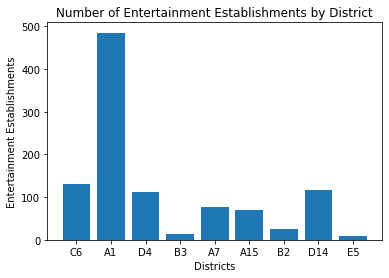

In [37]:
num_establishments = e['District'].value_counts()

num_establishments

districts_x = ['C6', 'A1', 'D4', 'B3',  'A7',  'A15',  'B2',  'D14',  'E5']

establishments_y = [131, 485, 112, 13, 77, 70, 25, 116, 8]

plt.bar(districts_x, establishments_y)
plt.xlabel('Districts')
plt.ylabel('Entertainment Establishments')
plt.title('Number of Entertainment Establishments by District')

In [38]:
food = pd.read_csv('data/foodEstablishments.csv')
food = food[['BusinessName', 'ZIP']]
food['District'] = food['ZIP'].apply(lambda x: get_district(x))
food

,BusinessName,ZIP,District
0,# 7 RESTAURANT,02132,Unknown
1,100 Federal Market & Barista- 11th Floor,02110,Unknown
2,11 Dining -16th Fl.,02116,Unknown
3,110 Grill,02125,Unknown
4,129 Lake Street Cafe,02135,Unknown
...,...,...,...
3003,ZESTO'S PIZZA,02130,Unknown
3004,Ziggy's,02135,Unknown
3005,Zo,02109,Unknown
3006,Zuma Restaurant,02115,Unknown
